# Writing data to and reading data from a Database using Python

## Libraries and settings

In [1]:
# Libraries
import os
import sqlite3
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Function to close a sqlite db-connection
def check_conn(conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False

# Get current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_02


## Create sqlite data base from csv file

In [ ]:
# Create data base
conn = sqlite3.connect('supermarkets_data.db') 
cursor = conn.cursor()

# Show .db files in the directory
print("\nAvailable .db files:")
flist = fnmatch.filter(os.listdir('.'), '*.db')
for f in flist:
    print(f)

# ---------------------------------------
# Load the prepared supermarkets CSV data
# (generated in Task 3)
# ---------------------------------------
df = pd.read_csv('supermarkets_data_prepared.csv')

print("\nPreview of loaded supermarkets data:")
df.head()


Available .db files:
supermarkets_data.db
apartment_database.db

Preview of loaded supermarkets data:


,type,id,lat,lon,brand,shop,city,street,housenumber,postcode
0,node,33126515,47.155616,9.037915,Spar,supermarket,NaN,NaN,NaN,NaN
1,node,36726161,47.226191,8.980329,Migros,supermarket,Uznach,Zürcherstrasse,25,8730.0
2,node,39768209,47.225069,8.969981,Coop,supermarket,Uznach,NaN,NaN,8730.0
3,node,39947904,47.376732,8.542161,Coop,supermarket,Zürich,Bahnhofbrücke,1,8001.0
4,node,48932835,47.375020,8.522895,Migros,supermarket,Zürich,Wengistrasse,7,8004.0


## Create SQL-table in the database

In [3]:
cursor.execute('''CREATE TABLE IF NOT EXISTS supermarkets_table (
        type TEXT,
        id INTEGER,
        lat REAL,
        lon REAL,
        brand TEXT,
        shop TEXT,
        city TEXT,
        street TEXT,
        housenumber TEXT,
        postcode TEXT
    )
''')

# Confirm changes to the table
conn.commit()

## Read data from file to data frame

In [4]:
df = pd.read_csv('supermarkets_data_prepared.csv',
    sep=',',
    encoding='utf-8')[['type','id','lat','lon','brand','shop','city','street','housenumber','postcode']]

print(df.shape)
df.head(5)


(3392, 10)


,type,id,lat,lon,brand,shop,city,street,housenumber,postcode
0,node,33126515,47.155616,9.037915,Spar,supermarket,NaN,NaN,NaN,NaN
1,node,36726161,47.226191,8.980329,Migros,supermarket,Uznach,Zürcherstrasse,25,8730.0
2,node,39768209,47.225069,8.969981,Coop,supermarket,Uznach,NaN,NaN,8730.0
3,node,39947904,47.376732,8.542161,Coop,supermarket,Zürich,Bahnhofbrücke,1,8001.0
4,node,48932835,47.375020,8.522895,Migros,supermarket,Zürich,Wengistrasse,7,8004.0


## Write data to the SQL-table in data base

In [5]:
df.to_sql(
    name='supermarkets_table',
    con=conn,
    index=False,
    if_exists='replace'
)


3392

## Query the SQL-table

In [6]:
# Query the SQL-table
cursor.execute("""SELECT *
    FROM supermarkets_table
""")

df = pd.DataFrame(
    cursor.fetchall(),
    columns=['type','id','lat','lon','brand','shop','city','street','housenumber','postcode']
)

df

,type,id,lat,lon,brand,shop,city,street,housenumber,postcode
0,node,33126515,47.155616,9.037915,Spar,supermarket,None,None,None,NaN
1,node,36726161,47.226191,8.980329,Migros,supermarket,Uznach,Zürcherstrasse,25,8730.0
2,node,39768209,47.225069,8.969981,Coop,supermarket,Uznach,None,None,8730.0
3,node,39947904,47.376732,8.542161,Coop,supermarket,Zürich,Bahnhofbrücke,1,8001.0
4,node,48932835,47.375020,8.522895,Migros,supermarket,Zürich,Wengistrasse,7,8004.0
...,...,...,...,...,...,...,...,...,...,...
3387,node,11099817248,46.928691,7.561873,None,supermarket,None,None,None,NaN
3388,node,11103235832,46.166742,8.771970,Migros,supermarket,None,None,None,NaN
3389,node,11107076347,47.466556,9.048250,None,supermarket,Wil SG,Marktgasse,38,9500.0
3390,node,11107594883,47.322228,8.529748,None,supermarket,Adliswil,Dietlimoosplatz,1,8134.0


## Distribution of Supermarket Brands

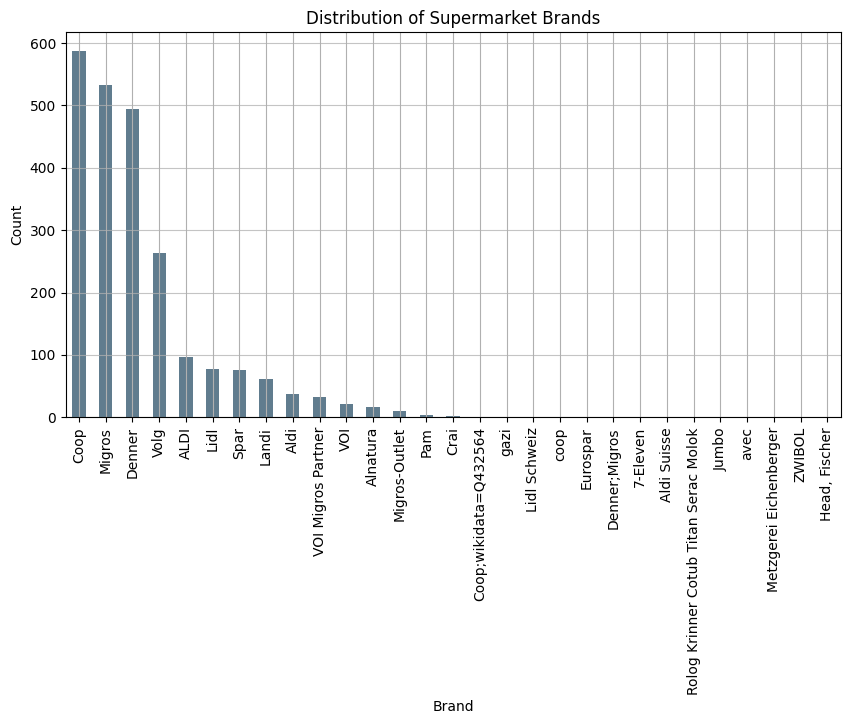

In [8]:
df['brand'].value_counts().plot.bar(
    figsize=(10,5),
    grid=True,
    color='#607c8e'
)

plt.title('Distribution of Supermarket Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()


## Close db connection (if open)

In [9]:
# Close db connection (if open)
try:
    if check_conn(conn):
        conn.close()
    else:
        pass
except:
    pass

# Status (True = open, False = closed)
print(check_conn(conn))

False


# Additional SQL queries (Task 4g)

In [10]:
# Create data base
conn = sqlite3.connect('supermarkets_data.db') 
cursor = conn.cursor()

# SQL query to filter all supermarkets in Winterthur

cursor.execute("""SELECT *
    FROM supermarkets_table
    WHERE city = 'Winterthur'
""")

df_sql_g = pd.DataFrame(
    cursor.fetchall(),
    columns=['type','id','lat','lon','brand','shop','city','street','housenumber','postcode']
)

df_sql_g

,type,id,lat,lon,brand,shop,city,street,housenumber,postcode
0,node,70656488,47.491874,8.706448,Migros,supermarket,Winterthur,Zürcherstrasse,102,8406.0
1,node,246533376,47.518953,8.720071,Migros,supermarket,Winterthur,Schaffhauserstrasse,152,8400.0
2,node,548919417,47.506863,8.712208,Migros,supermarket,Winterthur,Wülflingerstrasse,71,8400.0
3,node,677194765,47.503208,8.752131,None,supermarket,Winterthur,Frauenfelderstrasse,69,8404.0
4,node,706203439,47.500848,8.725938,None,supermarket,Winterthur,Bankstrasse,8/12,8400.0
5,node,709022324,47.498421,8.729118,None,supermarket,Winterthur,Steinberggasse,18,8400.0
6,node,1328945987,47.485289,8.762742,Migros,supermarket,Winterthur,Hinterdorfstrasse,40,8405.0
7,node,1519474175,47.485171,8.763196,Denner,supermarket,Winterthur,Hinterdorfstrasse,40,8405.0
8,node,3831772784,47.499163,8.721153,Migros,supermarket,Winterthur,Strickerstrasse,3,8400.0
9,node,4058248551,47.500117,8.731930,Migros,supermarket,Winterthur,Stadthausstrasse,31,8400.0


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [11]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2025-11-30 14:32:58
Python Version: 3.11.14
-----------------------------------
